# Assignment 6 - Week

Write a program called *assignment_6_weather* (.py or .ipynb). Get the data from this [link](https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv). For this assignment plot
- 1. The temperature
- 2. The mean temperature each day
- 3. The mean temperature for each month
- 4. The Windspeed (there is data missing from this column)
- 5. The rolling windspeed (over 24 hours)
- 6. The max windspeed for each day
- 7. The monthly mean of the daily max windspeeds

In [1]:
# import modules
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import dataset
path = 'https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv'
knock_weather_data = pd.read_csv(path, skiprows=22, low_memory=False)
# setting low_memory to false to stop guessing of column dtypes as this is memory intensive
print(knock_weather_data.shape)
print(knock_weather_data.head())

(248394, 21)
                date  ind rain  ind.1  temp  ind.2  wetb  dewpt  vappr  rhum  \
0  10-apr-1996 14:00    0  0.0      0  11.5      0   8.1    3.9    0.0     0   
1  31-jul-1996 08:00    0  0.0      0  11.5      0  11.1   10.7    0.0     0   
2  31-jul-1996 09:00    0  0.0      0  11.6      0  10.7    9.8    0.0     0   
3  31-jul-1996 10:00    0  0.0      0  12.9      0  11.3    9.8    0.0     0   
4  31-jul-1996 11:00    0  0.0      0  14.5      0  10.8    7.0    0.0     0   

   ... ind.3  wdsp ind.4  wddir  ww   w  sun    vis clht clamt  
0  ...     0     0     0      0  25  81  0.0  35000   32     5  
1  ...     0     0     0      0  25  82  0.0  40000   45     5  
2  ...     0     0     0      0  80  81  0.0   8000   32     7  
3  ...     0     0     0      0  25  82  0.0  28000   35     6  
4  ...     0     0     0      0   2  11  0.0  40000   40     6  

[5 rows x 21 columns]


Several of the first rows of the dataset contain infomation about the data as shown below. The data does not begin until row 24 in Excel (row 22 when indexed with python). 

![Excel file data](img/weather.png)

Column metadata includes 
- `date` -  Date and Time (utc)
- `rain` -  Precipitation Amount (mm)	  
- `temp` -  Air Temperature ($^{\circ}C$)
- `wetb` -  Wet Bulb Temperature ($^{\circ}C$)
- `dewpt` -  Dew Point Temperature ($^{\circ}C$)            
- `rhum` -  Relative Humidity (%)
- `vappr` -  Vapour Pressure (hPa)	 
- `msl` -  Mean Sea Level Pressure (hPa)
- `wdsp` -  Mean Wind Speed (knot)
- `wddir` -  Predominant Wind Direction (degree)
- `ww` -  Synop code for Present Weather
- `w` -  Synop code for Past Weather
- `sun` -  Sunshine duration (hours)
- `vis` -  Visibility (m)
- `clht` -  Cloud height (100's of ft) - 999 if none 
- `clamt` -  Cloud amount
- `ind` -  Indicator

The Knock station has specific spatial corrdinates (Latitude:53.906, Longitude: -8.817) at a height of 201 m (ASL). 


In [3]:
# the date object has object datetype and since it is in the UTZ, it can be converted to a datetime object for plotting. 
knock_weather_data['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 248394 entries, 0 to 248393
Series name: date
Non-Null Count   Dtype 
--------------   ----- 
248394 non-null  object
dtypes: object(1)
memory usage: 1.9+ MB


In [4]:
knock_weather_data['date'] = pd.to_datetime(knock_weather_data['date'], \
                                             dayfirst=True, utc=True, format='mixed')
knock_weather_data['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 248394 entries, 0 to 248393
Series name: date
Non-Null Count   Dtype              
--------------   -----              
248394 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 1.9 MB


In [5]:
knock_weather_data.head()

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,1996-04-10 14:00:00+00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,1996-07-31 08:00:00+00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,1996-07-31 09:00:00+00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,1996-07-31 10:00:00+00:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,1996-07-31 11:00:00+00:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


In [6]:
# setting date to index and sorting by index to ensure data is sorted properly 
knock_weather_data.set_index('date', inplace=True)

# sort values
sorted_index = knock_weather_data.index.sort_values()
knock_weather_data = knock_weather_data.loc[sorted_index]

## 1 - Plot the Temperature 

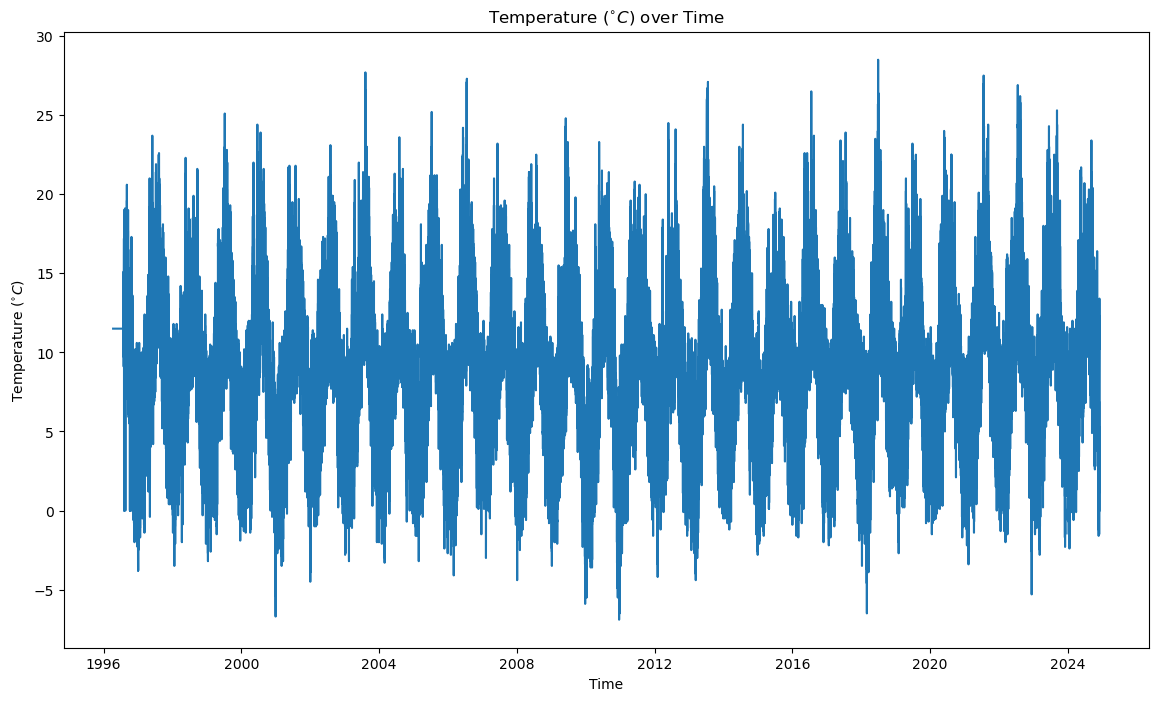

In [7]:
fig, ax = plt.subplots(figsize=(14,8))
sns.lineplot(data=knock_weather_data,x='date',y='temp')
ax.set_ylabel('Temperature ($^{\circ}C$)')
ax.set_xlabel('Time')
ax.set_title('Temperature ($^{\circ}C$) over Time');

## 2 - The Mean Temperature for each day

There are 10463 resampled daily points from 248394 data points


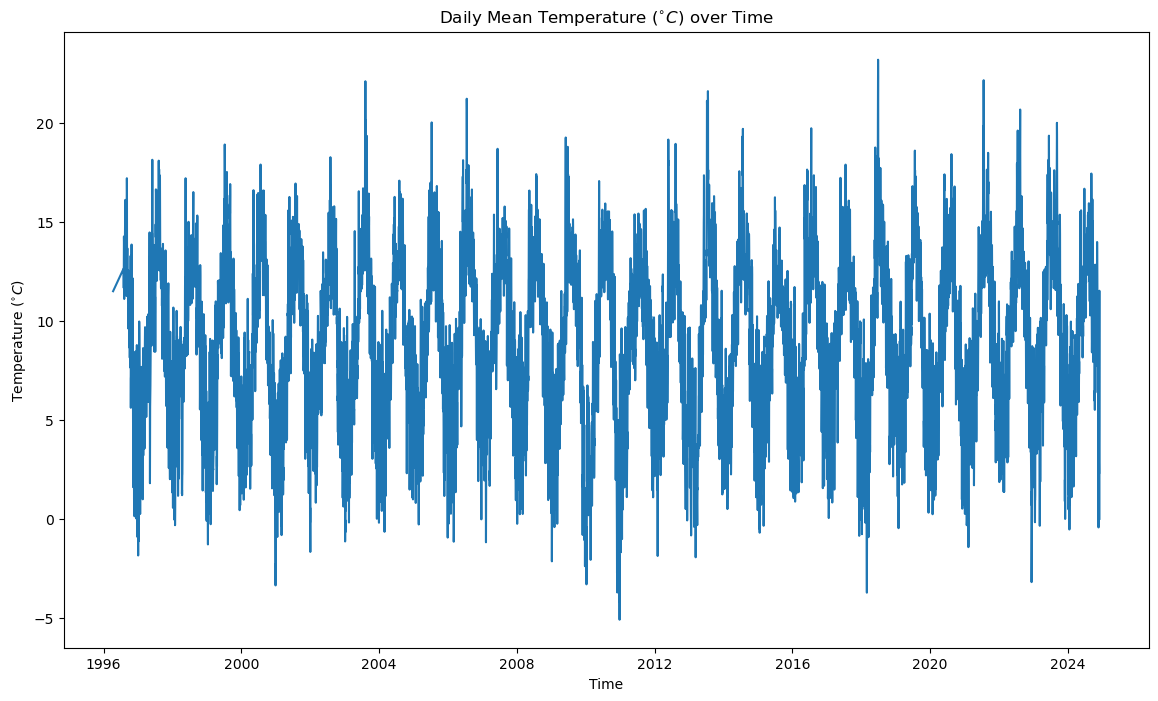

In [8]:
mean_daily_temp = knock_weather_data['temp'].resample('D').mean() # resampling per day 
print(f"There are {mean_daily_temp.shape[0]} resampled daily points from {knock_weather_data.shape[0]} data points")
# 247674 records downsampled to 10402 records

fig, ax = plt.subplots(figsize=(14,8))
sns.lineplot(mean_daily_temp)
ax.set_ylabel('Temperature ($^{\circ}C$)')
ax.set_xlabel('Time')
ax.set_title('Daily Mean Temperature ($^{\circ}C$) over Time');

## 3 - The mean temperature for each month

There are 345 resampled monthly points from 248394 data points


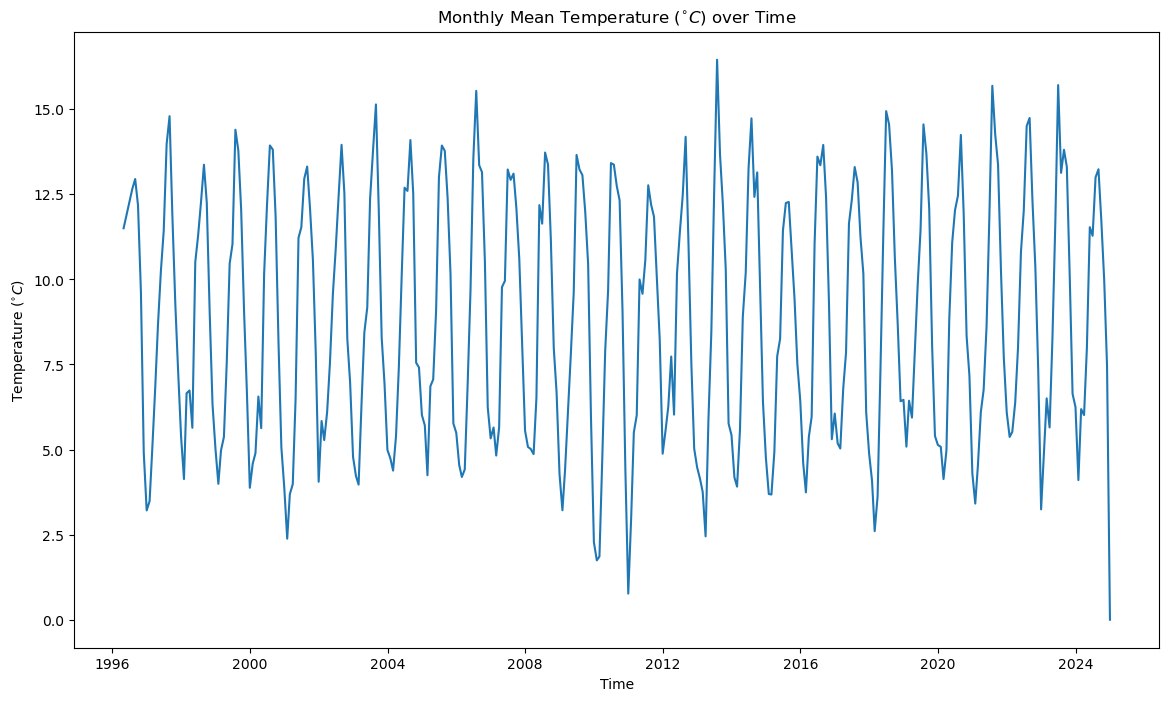

In [9]:
mean_monthly_temp = knock_weather_data['temp'].resample('ME').mean() # resampling per Calander month end
# M is deprecated so ME used instead https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects
print(f"There are {mean_monthly_temp.shape[0]} resampled monthly points from {knock_weather_data.shape[0]} data points")
# 247674 records downsampled to 344 records


fig, ax = plt.subplots(figsize=(14,8))
sns.lineplot(mean_monthly_temp)
ax.set_ylabel('Temperature ($^{\circ}C$)')
ax.set_xlabel('Time')
ax.set_title('Monthly Mean Temperature ($^{\circ}C$) over Time');

## 4 - The Windspeed (there is data missing from this column)

In [10]:
knock_weather_data['wdsp'].isna().sum()
# according to the isna() function there are no missing values 

0

In [11]:
knock_weather_data['wdsp'].value_counts()
# checking by value counts, there are 50 rows that have white space

wdsp
6     23442
7     22576
5     21651
8     20498
9     19037
10    17636
4     16553
11    15579
12    13981
13    11851
3     10358
14    10171
15     8296
16     6554
17     5241
2      5014
18     4277
19     3270
20     2537
1      1947
21     1926
22     1538
23     1055
24      815
25      617
26      433
0       410
27      341
28      240
29      169
30      102
31       70
32       53
         50
33       39
34       24
35        9
37        7
38        6
39        6
36        5
40        4
42        2
49        1
50        1
48        1
43        1
Name: count, dtype: int64

In [12]:
knock_weather_data['wdsp'].str.startswith(' ').sum()
# these contain white space so can convert to np.nan

50

In [13]:
# using a np.where() funcion to find any rows that have whitespace for wdsp and replace with np.nan, else use orgional value
knock_weather_data['wdsp'] = np.where(knock_weather_data['wdsp'].str.startswith(' '), np.nan, knock_weather_data['wdsp'])

In [14]:
knock_weather_data['wdsp'].isna().sum()
# we now have np.nan values

50

In [15]:
# fftill (forward fill) or bfill (backfill) can be used to input data from rows. since the number of nans are no small a bfill method can be used.
## other inputation methods such as filling with mean/median could be used, or replace with a constant value such as 0 (but only 408 zeros for wdsp)

knock_weather_data['wdsp'] = knock_weather_data['wdsp'].bfill()

In [16]:
knock_weather_data['wdsp'].isna().sum()
# this has worked 

0

In [17]:
# need to conve to numeric as white spaces couldnt be converted before
knock_weather_data['wdsp'] = pd.to_numeric(knock_weather_data['wdsp'])

There are 115 resampled monthly points from 248394 data points


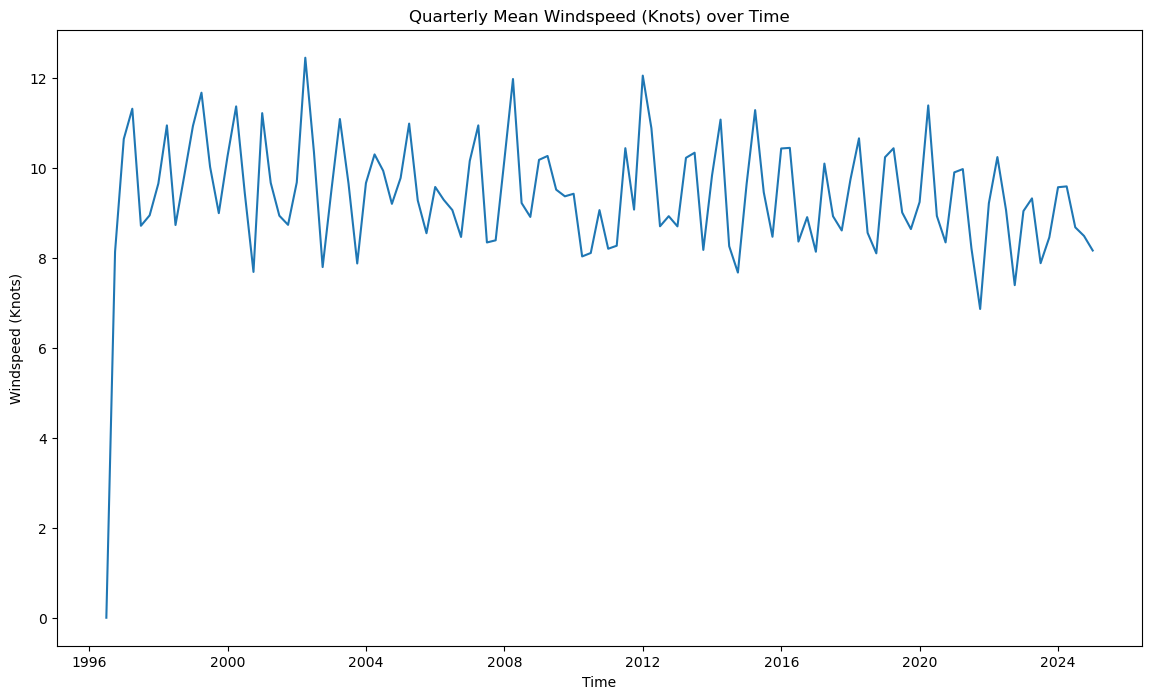

In [18]:
mean_quarterly_windspeed = knock_weather_data['wdsp'].resample('QE').mean() # resampling per week
print(f"There are {mean_quarterly_windspeed.shape[0]} resampled monthly points from {knock_weather_data.shape[0]} data points")
# 247674 records downsampled to 344 records


fig, ax = plt.subplots(figsize=(14,8))
sns.lineplot(mean_quarterly_windspeed)
ax.set_ylabel('Windspeed (Knots)')
ax.set_xlabel('Time')
ax.set_title('Quarterly Mean Windspeed (Knots) over Time');

## 5 - The rolling windspeed (over 24 hours)

In [19]:
knock_weather_data['rolling_wdsp'] = knock_weather_data['wdsp'].rolling('24h').mean()

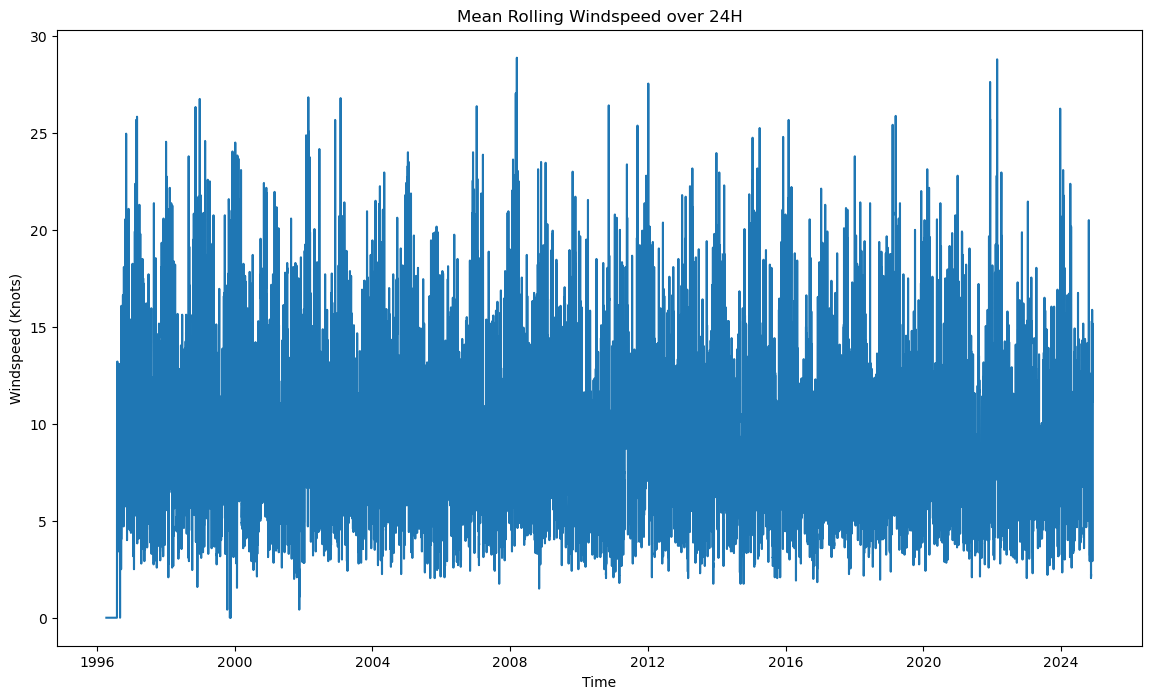

In [20]:
fig, ax = plt.subplots(figsize=(14,8))
sns.lineplot(data=knock_weather_data,x='date',y='rolling_wdsp')
ax.set_ylabel('Windspeed (Knots)')
ax.set_xlabel('Time')
ax.set_title('Mean Rolling Windspeed over 24H');

# there is a lot of data here 

## 6- The max windspeed for each day

There are 10463 resampled monthly points from 248394 data points


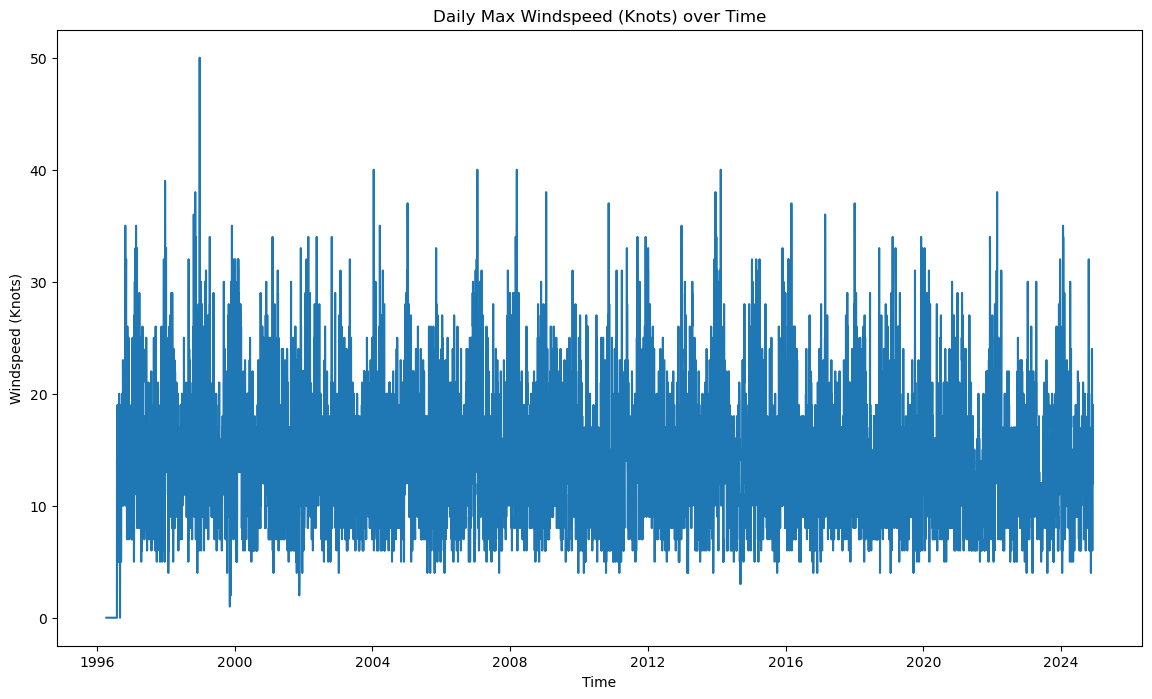

In [21]:
max_daily_windspeed = knock_weather_data['wdsp'].resample('D').max() # resampling per wday
print(f"There are {max_daily_windspeed.shape[0]} resampled monthly points from {knock_weather_data.shape[0]} data points")
# 247674 records downsampled to 10433 records


fig, ax = plt.subplots(figsize=(14,8))
sns.lineplot(max_daily_windspeed)
ax.set_ylabel('Windspeed (Knots)')
ax.set_xlabel('Time')
ax.set_title('Daily Max Windspeed (Knots) over Time');

## 7 - The monthly mean of the daily max windspeeds 

There are 345 resampled monthly points from 248394 data points


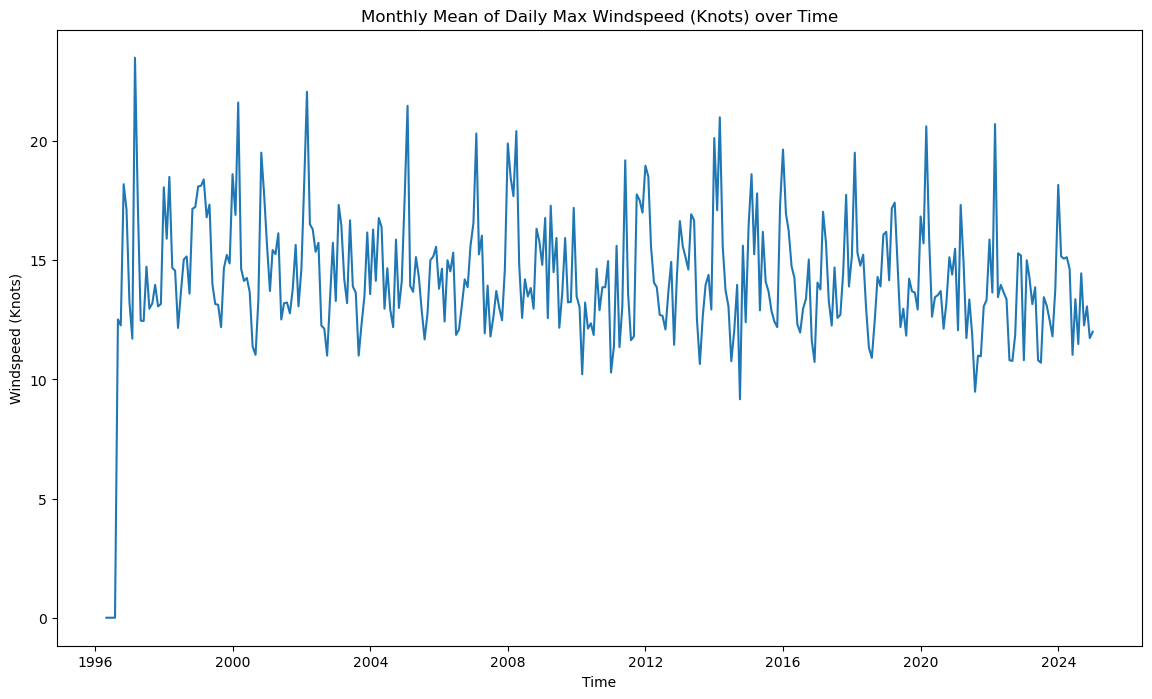

In [22]:
max_daily_windspeed = knock_weather_data['wdsp'].resample('D').max() # resampling per day
monthly_mean_windspeed = max_daily_windspeed.resample('ME').mean() # resampling per month of daily max
print(f"There are {monthly_mean_windspeed.shape[0]} resampled monthly points from {knock_weather_data.shape[0]} data points")
# 247674 records downsampled to 344 records


fig, ax = plt.subplots(figsize=(14,8))
sns.lineplot(monthly_mean_windspeed )
ax.set_ylabel('Windspeed (Knots)')
ax.set_xlabel('Time')
ax.set_title('Monthly Mean of Daily Max Windspeed (Knots) over Time');